# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

## Description of Columns
- **FRESH**: annual spending (m.u.) on fresh products (Continuous);
- **MILK**: annual spending (m.u.) on milk products (Continuous);
- **GROCERY**: annual spending (m.u.) on grocery products (Continuous);
- **FROZEN**: annual spending (m.u.) on frozen products (Continuous);
- **DETERGENTS_PAPER**: annual spending (m.u.) on detergents and paper products (Continuous);
- **DELICATESSEN**: annual spending (m.u.) on delicatessen products (Continuous);
- **CHANNEL**: Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal);
- **REGION**: Lisbon, Oporto or Other (Nominal);

In [1]:
# Importing Pandas
import pandas as pd

# Loading the Wholesale_Data for the project
df = pd.read_csv('Wholesale_Data.csv')

## EDA & Data Cleaning

In [12]:
# Shape of the dataframe
print(df.shape)

(440, 8)


In [10]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# Display first few rows
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [8]:
# Statistical summary of numerical columns
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Count of unique values in each column
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [17]:
# Checking for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [48]:
# I don't think the customer of a wholesale distributor can purchase anything for less than 50 dollars or it is very unlikely.
# We will replace these values with the Mean of the column to be sure everything is more realistic to an actual wholesales order.

In [49]:
# Starting with the Fresh column

# Filtering the DataFrame to see how many rows have values below the threshold
fresh_filtered_df = df[df['Fresh'] <= 50]

fresh_filtered_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [50]:
# Calculate the mean of the 'Fresh' column excluding values below my desired threshold.
mean_fresh = df[df['Fresh'] > 50]['Fresh'].mean()

# Replace values in the 'Fresh' column with the calculated mean
df.loc[df['Fresh'] <= 50, 'Fresh'] = mean_fresh

In [51]:
# Now we work on the Grocery column

# Filtering the DataFrame to see how many rows have values under the threshold
Grocery_filtered_df = df[df['Grocery'] <= 100]

Grocery_filtered_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [52]:
# Calculate the mean of the 'Grocery' column excluding values below my desired threshold.
mean_Grocery = df[df['Grocery'] > 100]['Grocery'].mean()

# Replace values in the 'Grocery' column with the calculated mean
df.loc[df['Grocery'] <= 100, 'Grocery'] = mean_Grocery

In [53]:
# Now working on the Detergents_Paper column

# Filtering the DataFrame to see how many rows have values below the threshold
Detergents_Paper_filtered_df = df[df['Detergents_Paper'] <= 25]

Detergents_Paper_filtered_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [54]:
# Calculate the mean of the 'Detergents_Paper' column excluding values below my desired threshold.
mean_Detergents_Paper = df[df['Detergents_Paper'] > 25]['Detergents_Paper'].mean()

# Replace values in the 'Detergents_Paper' column with the calculated mean
df.loc[df['Detergents_Paper'] <= 25, 'Detergents_Paper'] = mean_Detergents_Paper

In [55]:
# Now doing it for Delicassen

# Filtering the DataFrame to see how many rows have values below the threshold
Delicassen_filtered_df = df[df['Delicassen'] <= 50]

Delicassen_filtered_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
42,2,3,10850.000000,7555,14961.0,188,6899.000000,46
66,1,3,12165.986175,1534,7417.0,175,3468.000000,27
88,1,3,7864.000000,542,4042.0,9735,165.000000,46
109,2,3,1406.000000,16729,28986.0,673,836.000000,3
128,1,3,140.000000,8847,3823.0,142,1062.000000,3
137,1,3,3087.000000,8080,8282.0,661,721.000000,36
142,1,3,37036.000000,7152,8253.0,2995,2996.349882,3
154,1,3,622.000000,55,137.0,75,2996.349882,8
184,1,3,327.000000,918,4710.0,74,334.000000,11
187,1,3,2438.000000,8002,9819.0,6269,3459.000000,3


In [57]:
# Calculate the mean of the 'Delicassen' column excluding values below my desired threshold.
mean_Delicassen = df[df['Delicassen'] > 50]['Delicassen'].mean()

# Replace values in the 'Delicassen' column with the calculated mean
df.loc[df['Delicassen'] <= 50, 'Delicassen'] = mean_Delicassen

## Data Visualization

In [58]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

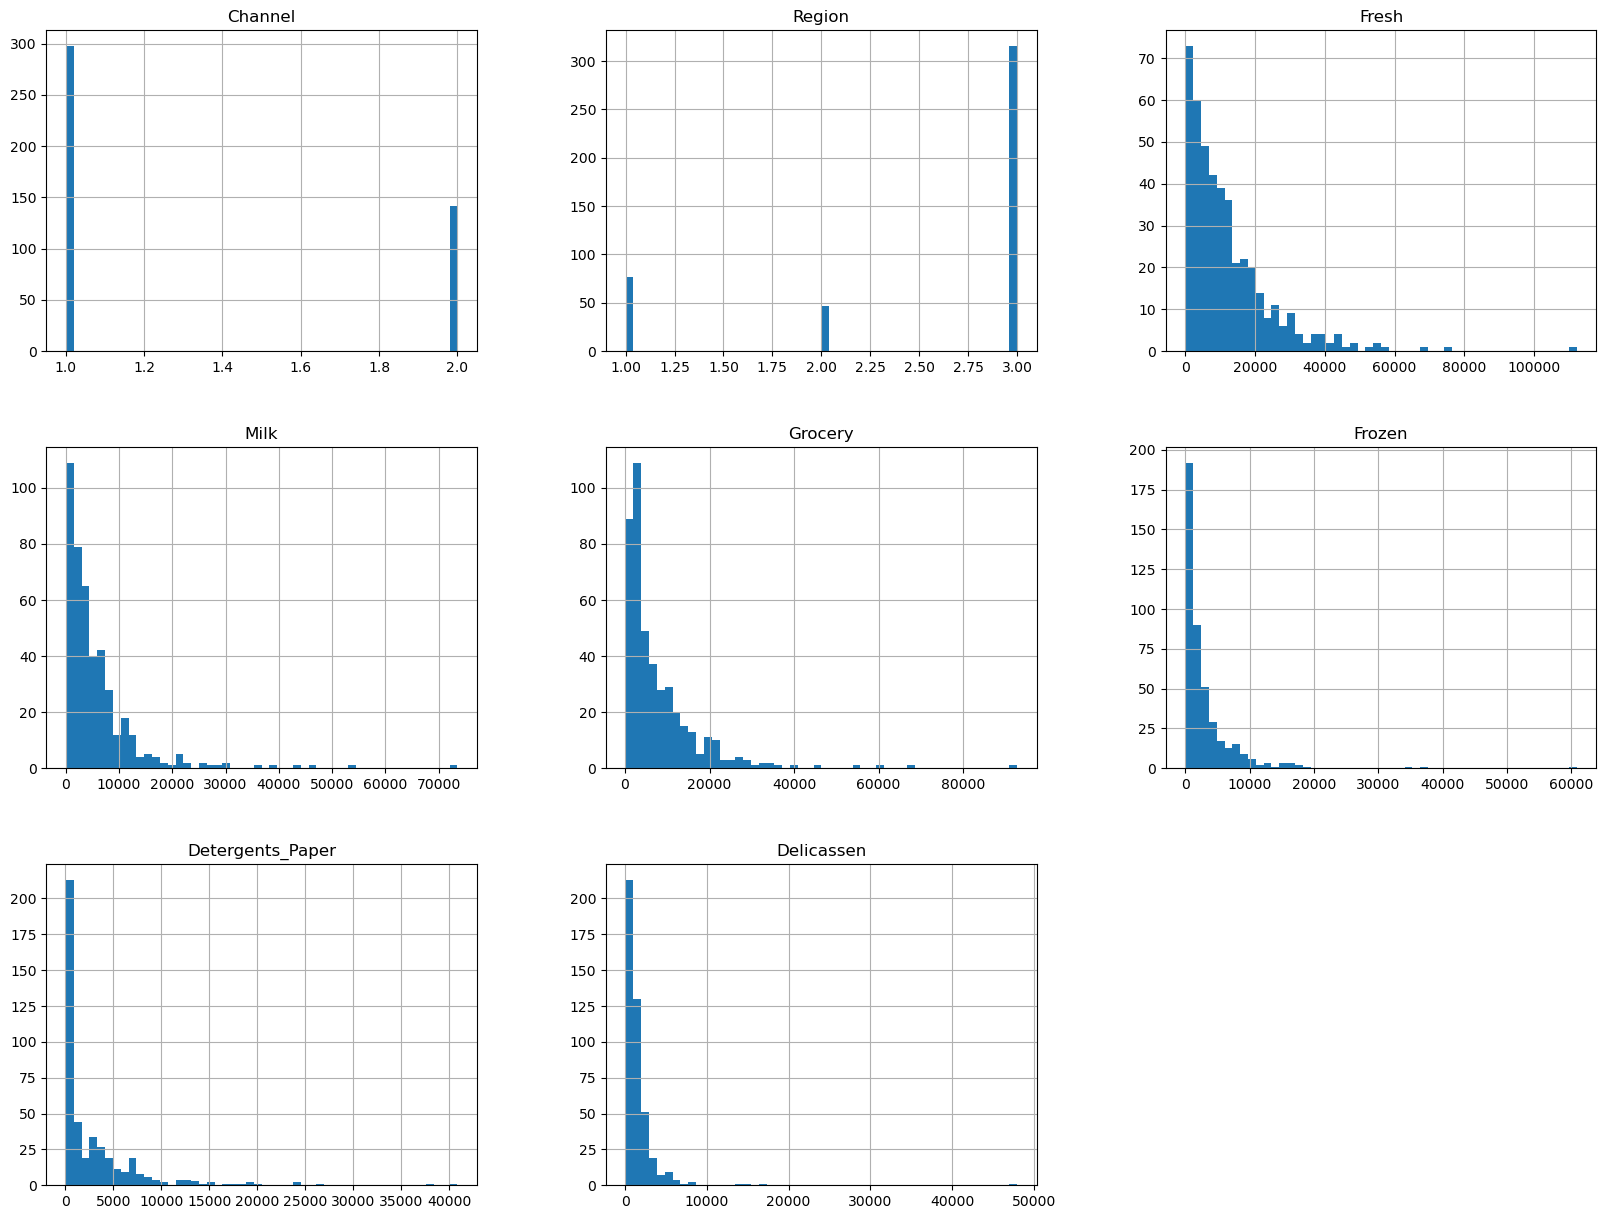

In [59]:
# Histograms for distribution
df.hist(bins=50, figsize=(20,15))
plt.show()

In [62]:
#Scatter plots to see if there are any obvious correlations

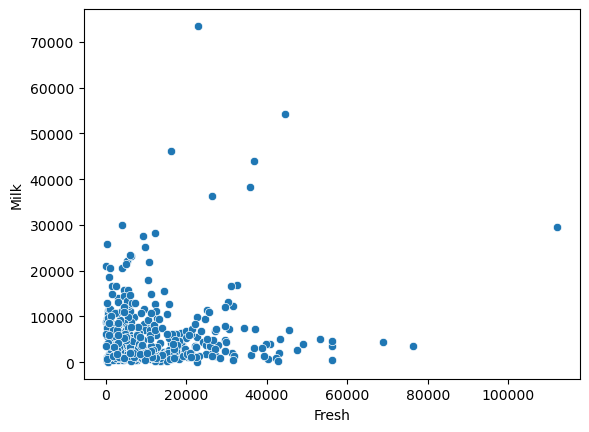

In [60]:
# Scatter plot between 'Fresh' and 'Milk'
sns.scatterplot(data=df, x='Fresh', y='Milk')
plt.show()

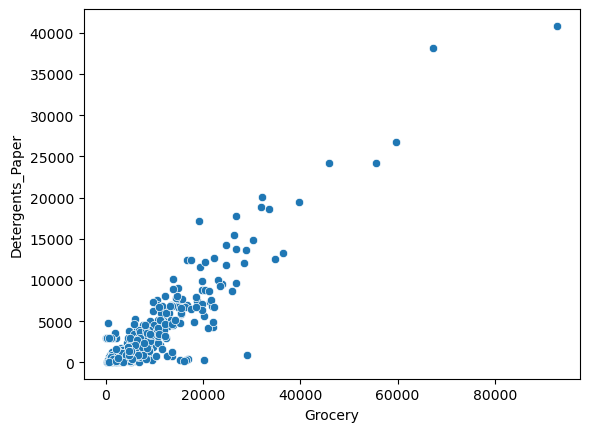

In [63]:
# Scatter plot between 'Grocery' and 'Detergents_Paper'
sns.scatterplot(data=df, x='Grocery', y='Detergents_Paper')
plt.show()

In [64]:
# We can see here a clear correlation. When someone spends more on Grocery items, they also seem to purchase more cleaning products.

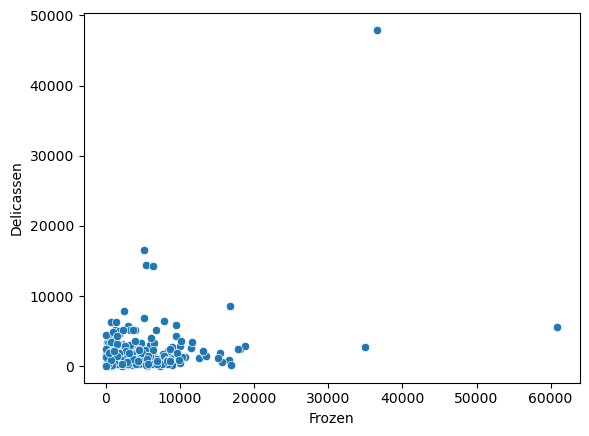

In [66]:
# Scatter plot between 'Frozen' and 'Delicassen'
sns.scatterplot(data=df, x='Frozen', y='Delicassen')
plt.show()

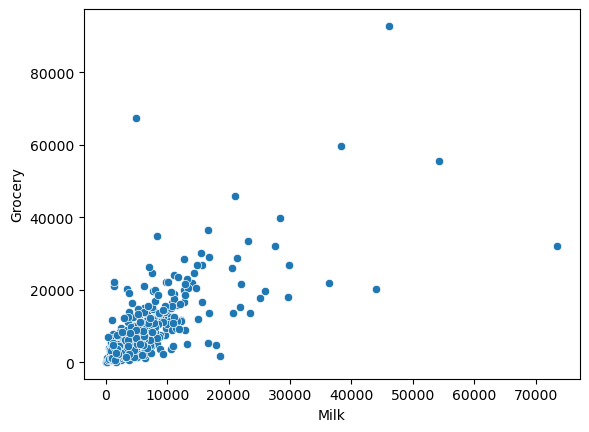

In [67]:
# Scatter plot between 'Milk' and 'Grocery'
sns.scatterplot(data=df, x='Milk', y='Grocery')
plt.show()

## Outlier Detection

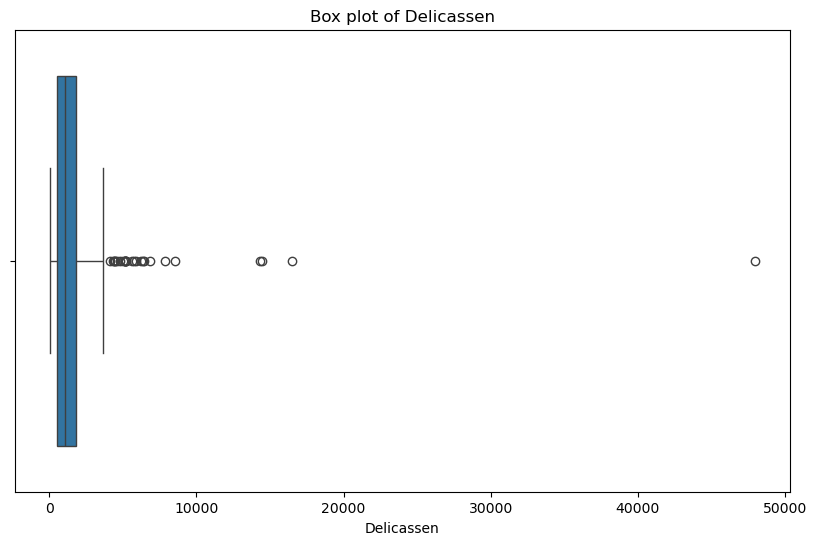

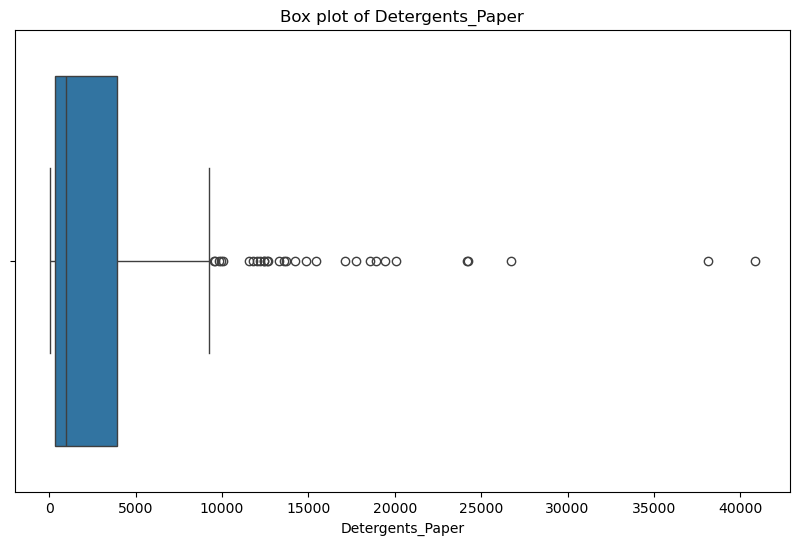

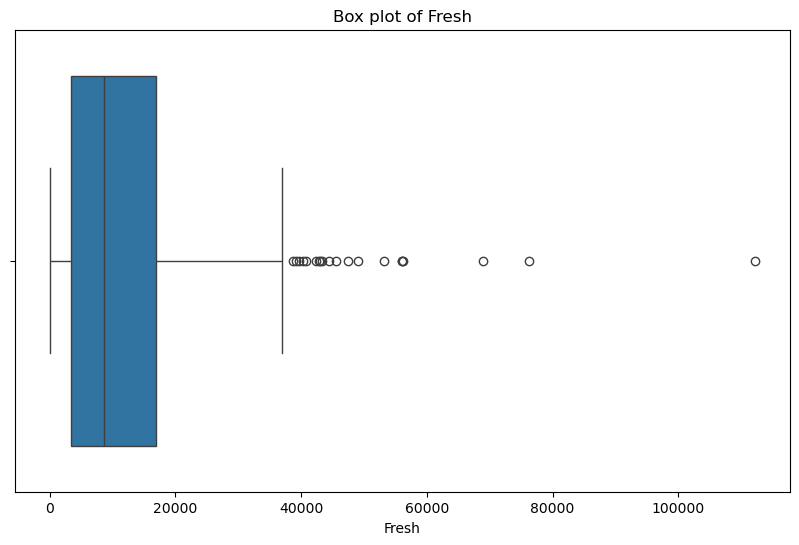

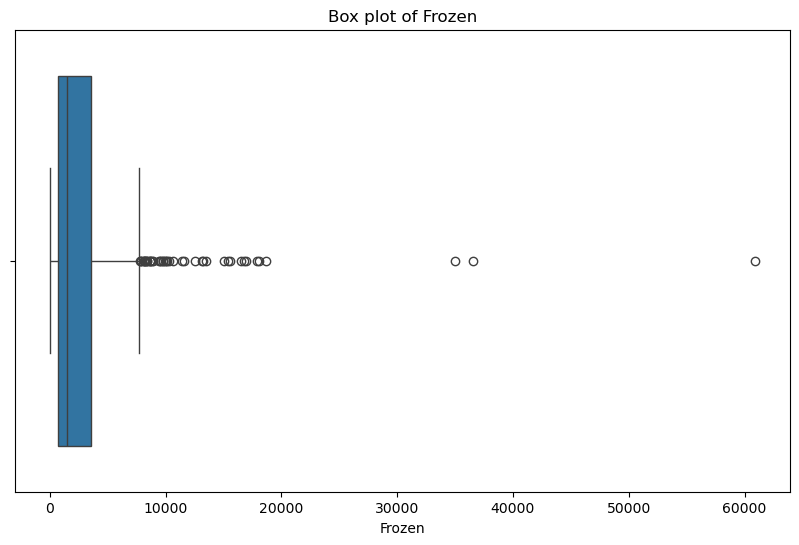

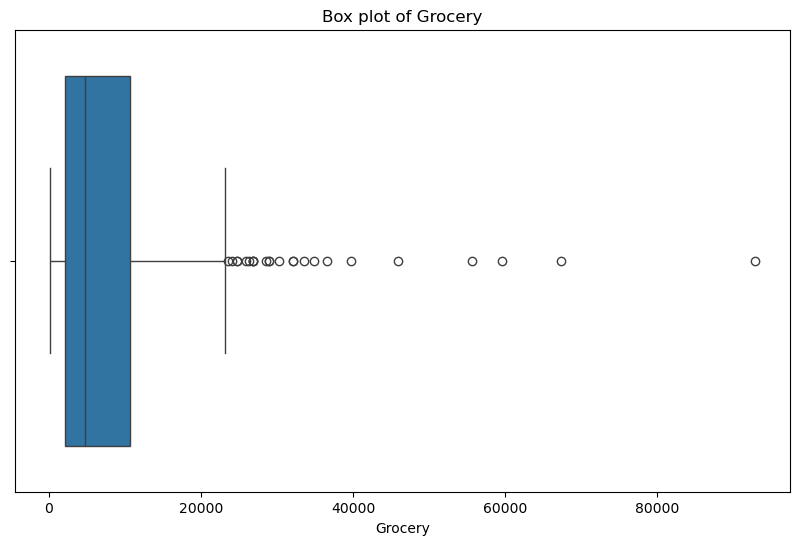

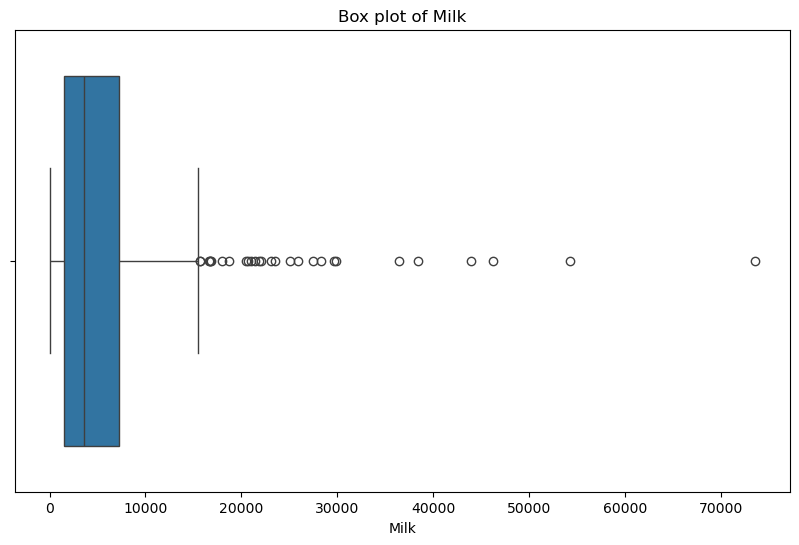

In [69]:
# Box plots to detect outliers (Excluding Channel and Region)

columns_to_exclude = ['Channel', 'Region']

# Selecting numeric columns and excluding specific ones
numeric_columns = df.select_dtypes(include=['number']).columns.difference(columns_to_exclude)

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [70]:
# I have chose to deal with these using the IQR Method.

from scipy import stats

In [71]:
# Delicassen Outliers
Q1 = df['Delicassen'].quantile(0.25)
Q3 = df['Delicassen'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Delicassen'] = df['Delicassen'].clip(lower_bound, upper_bound)

In [72]:
# Detergents_Paper Outliers
Q1 = df['Detergents_Paper'].quantile(0.25)
Q3 = df['Detergents_Paper'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Detergents_Paper'] = df['Detergents_Paper'].clip(lower_bound, upper_bound)

In [73]:
# Fresh Outliers
Q1 = df['Fresh'].quantile(0.25)
Q3 = df['Fresh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Fresh'] = df['Fresh'].clip(lower_bound, upper_bound)

In [74]:
# Frozen Outliers
Q1 = df['Frozen'].quantile(0.25)
Q3 = df['Frozen'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Frozen'] = df['Frozen'].clip(lower_bound, upper_bound)

In [75]:
# Grocery Outliers
Q1 = df['Grocery'].quantile(0.25)
Q3 = df['Grocery'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Grocery'] = df['Grocery'].clip(lower_bound, upper_bound)

In [76]:
# Milk Outliers
Q1 = df['Milk'].quantile(0.25)
Q3 = df['Milk'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Milk'] = df['Milk'].clip(lower_bound, upper_bound)

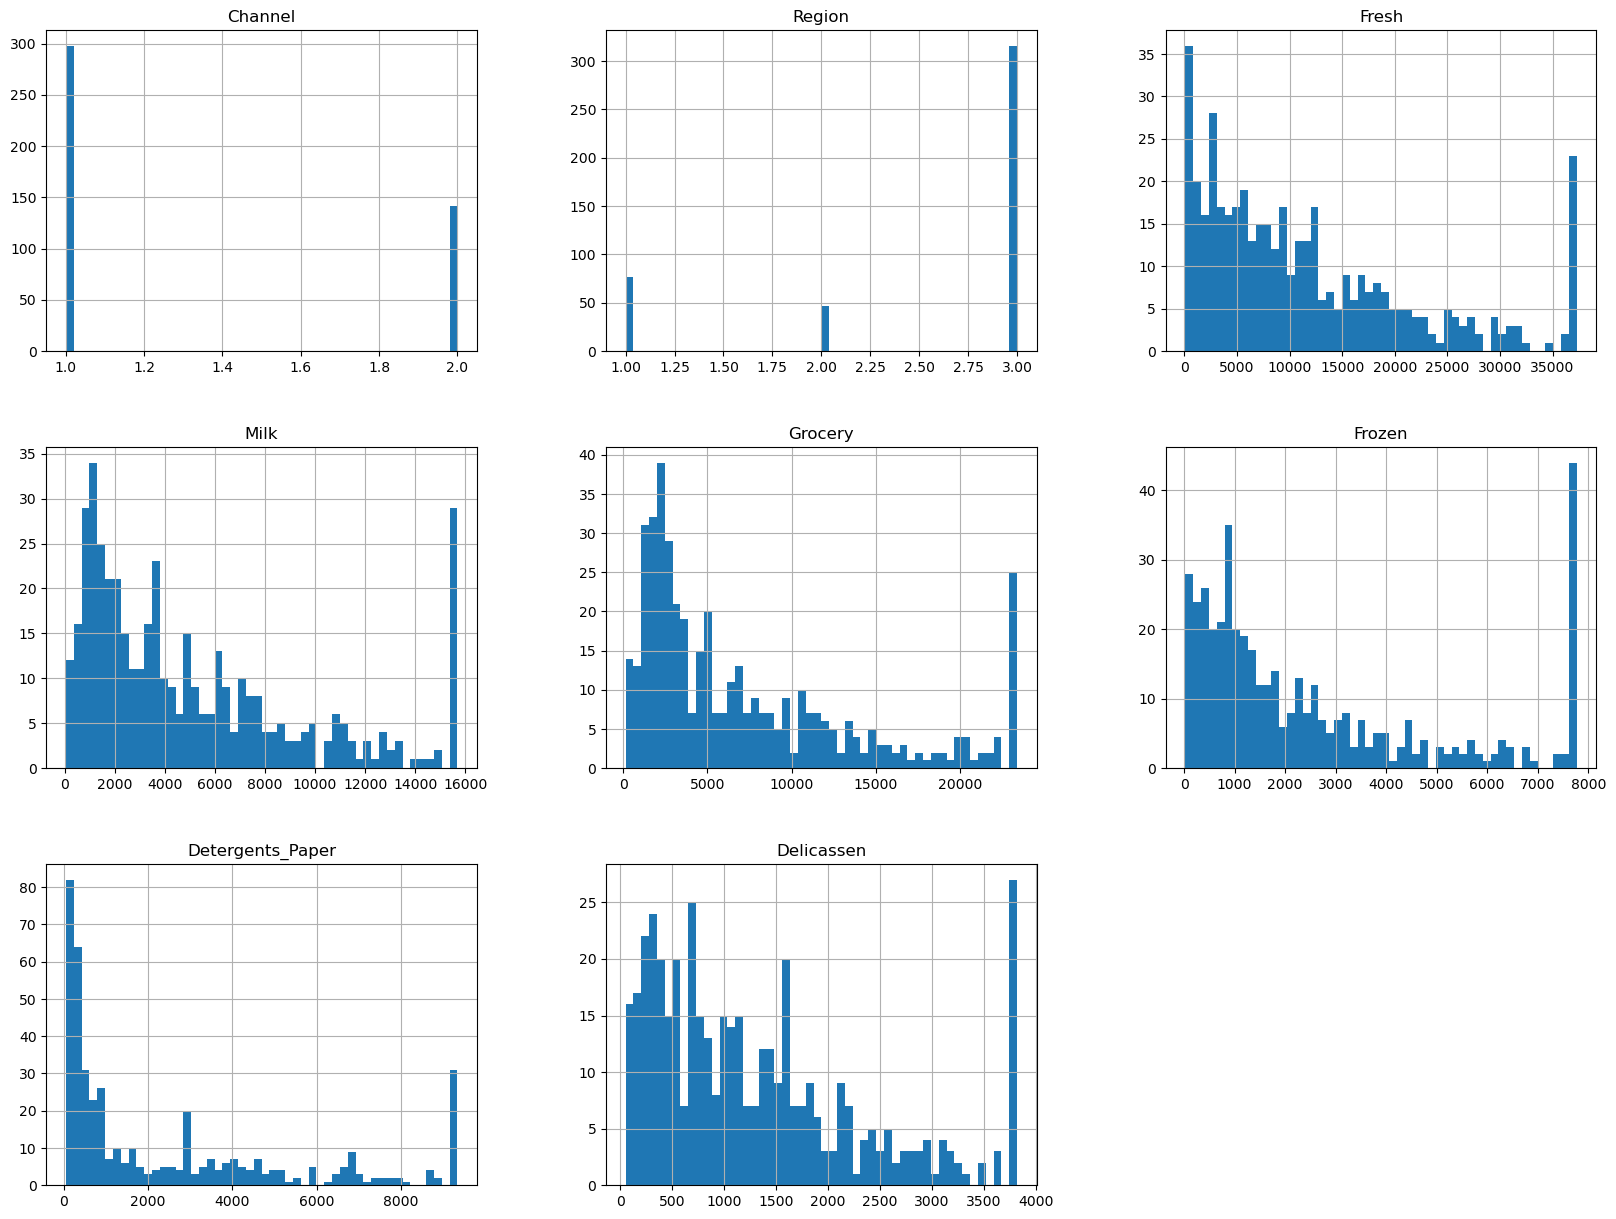

In [122]:
# Checking how it looks like now with the outliers fixed
df.hist(bins=50, figsize=(20,15))
plt.show()

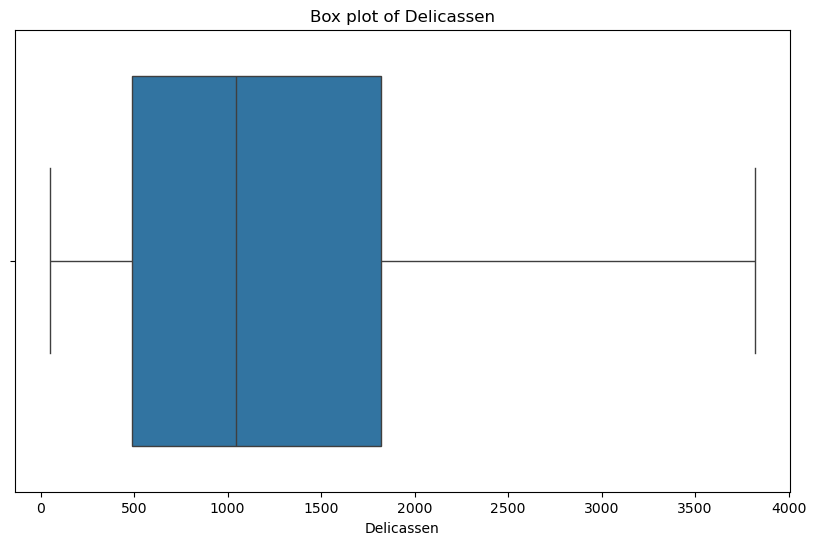

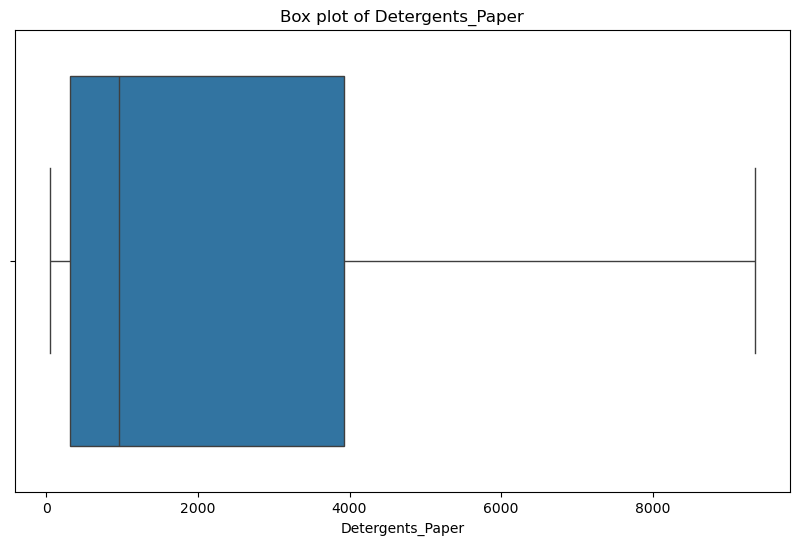

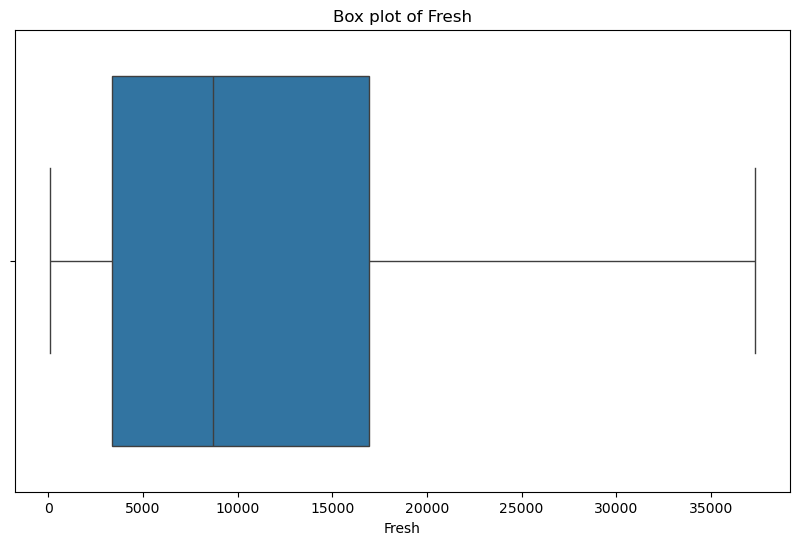

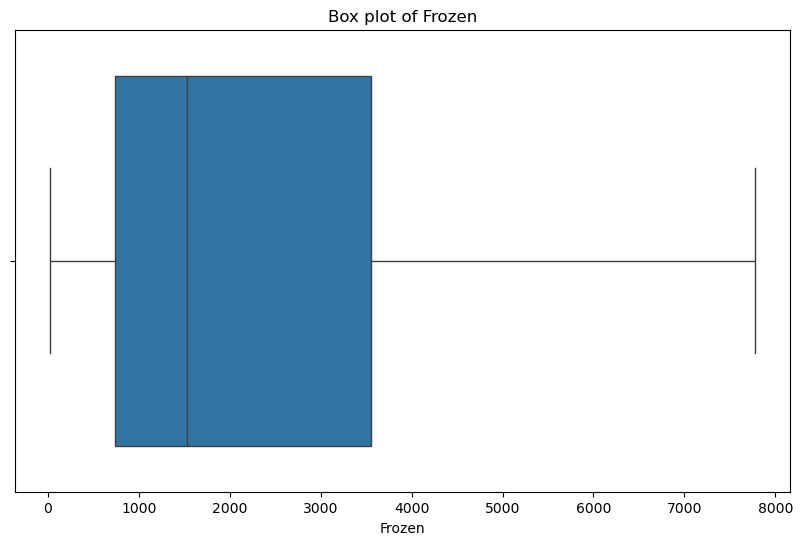

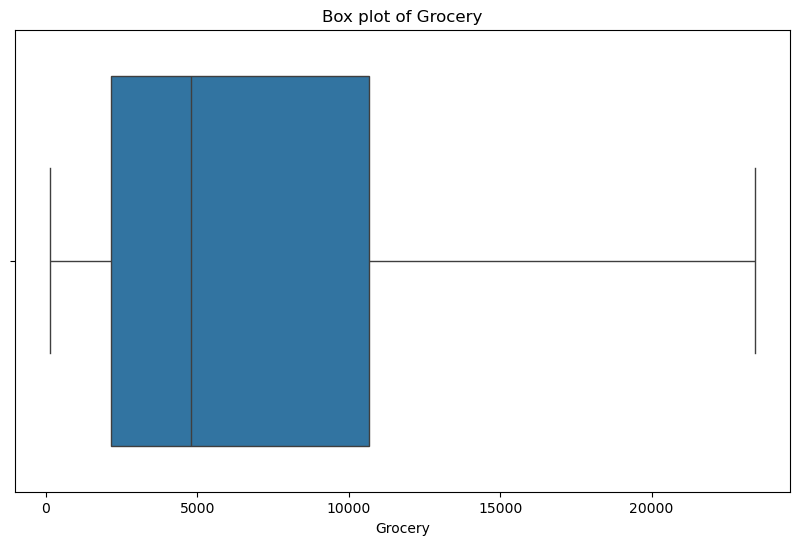

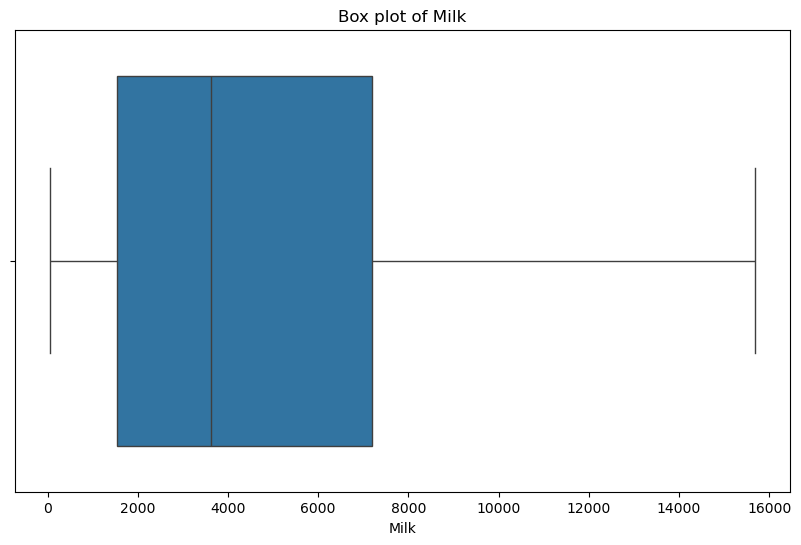

In [123]:
columns_to_exclude = ['Channel', 'Region']

numeric_columns = df.select_dtypes(include=['number']).columns.difference(columns_to_exclude)

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

## Deeper Correlation Analysis

In [80]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.167092,0.598616,0.718962,-0.254707,0.773525,0.158066
Region,0.062028,1.000000,0.056006,0.005734,0.006939,-0.050604,0.001457,0.028175
Fresh,-0.167092,0.056006,1.000000,-0.047068,-0.087568,0.352789,-0.211544,0.256294
Milk,0.598616,0.005734,-0.047068,1.000000,0.779811,-0.037049,0.670477,0.376288
Grocery,0.718962,0.006939,-0.087568,0.779811,1.000000,-0.135474,0.859791,0.299673
Frozen,-0.254707,-0.050604,0.352789,-0.037049,-0.135474,1.000000,-0.243229,0.223409
Detergents_Paper,0.773525,0.001457,-0.211544,0.670477,0.859791,-0.243229,1.000000,0.146150
Delicassen,0.158066,0.028175,0.256294,0.376288,0.299673,0.223409,0.146150,1.000000


In [81]:
# Strong Correlations

# Channel & Milk
# Milk & Detergent_Paper
# Milk & Grocery
# Grocery & Detergent_Paper
# Detergent_Paper & Channel
# Detergent_Paper & Milk

## Data Transformation

In [83]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [84]:
# Excluding 'Channel' and 'Region'
columns_to_scale = df.select_dtypes(include=['number']).columns.drop(['Channel', 'Region'])

# Scaling only the selected columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Creating a DataFrame from the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Including 'Channel' and 'Region' back into the DataFrame
df_final = pd.concat([df_scaled, df[['Channel', 'Region']]], axis=1)

In [85]:
# Display the first few rows of the final DataFrame to verify
df_final.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,0.115247,1.051586,0.046632,-0.953244,0.059476,0.024543,2,3
1,-0.441855,1.086735,0.351676,-0.309735,0.273811,0.445998,2,3
2,-0.511741,0.858040,0.065326,-0.042437,0.351027,2.411101,2,3
3,0.174412,-0.879308,-0.461016,1.619962,-0.690869,0.457545,1,3
4,1.102585,0.082487,-0.008541,0.585275,-0.251119,2.411101,2,3


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [87]:
# Importing Libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


## Determining the Optimal Number of Clusters

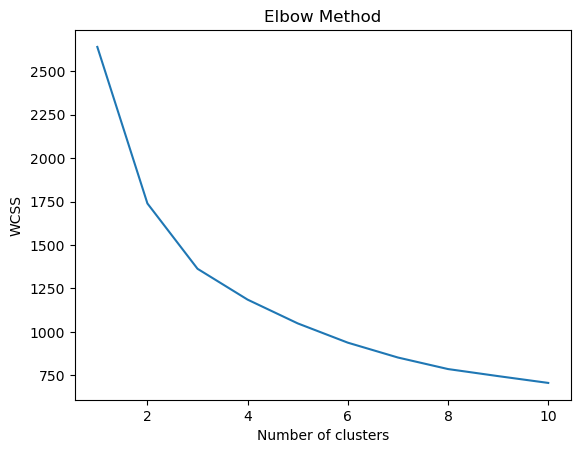

In [88]:
# Select only the scaled features for clustering
features = df_final.drop(['Channel', 'Region'], axis=1)

# Calculate WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
# We can see here that the optimal amount of clusters is between 3 and 4.
# We will use 4 clusters

## Running KMeans Clustering

In [90]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features)

# Add the cluster labels to the DataFrame
df_final['Cluster'] = cluster_labels

## Analyzing the Clusters

In [92]:
# Checking the cluster centers
print(kmeans.cluster_centers_)

[[-0.25148102 -0.51758468 -0.52623675 -0.45019852 -0.46393457 -0.46138631]
 [ 1.4960046   0.36488165  0.10065735  0.49380275 -0.27440833  1.32343621]
 [ 0.17173407 -0.43899279 -0.56162285  1.77504935 -0.58797696 -0.14215384]
 [-0.5522465   1.1886447   1.46335079 -0.46296246  1.59279361  0.23143946]]


In [94]:
# Analyzing clusters
cluster_analysis = df_final.groupby('Cluster').mean()
cluster_analysis

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
Cluster,,,,,,,,
0,-0.251481,-0.517585,-0.526237,-0.450199,-0.463935,-0.461386,1.138889,2.532407
1,1.496005,0.364882,0.100657,0.493803,-0.274408,1.323436,1.246154,2.615385
2,0.171734,-0.438993,-0.561623,1.775049,-0.587977,-0.142154,1.064516,2.516129
3,-0.552246,1.188645,1.463351,-0.462962,1.592794,0.231439,1.948454,2.536082


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [95]:
# Importing libraries
from scipy.cluster.hierarchy import dendrogram, linkage

In [96]:
# Using the linkage method to perform the hierarchical clustering
linked = linkage(df_final.drop(['Channel', 'Region', 'Cluster'], axis=1), 'ward')

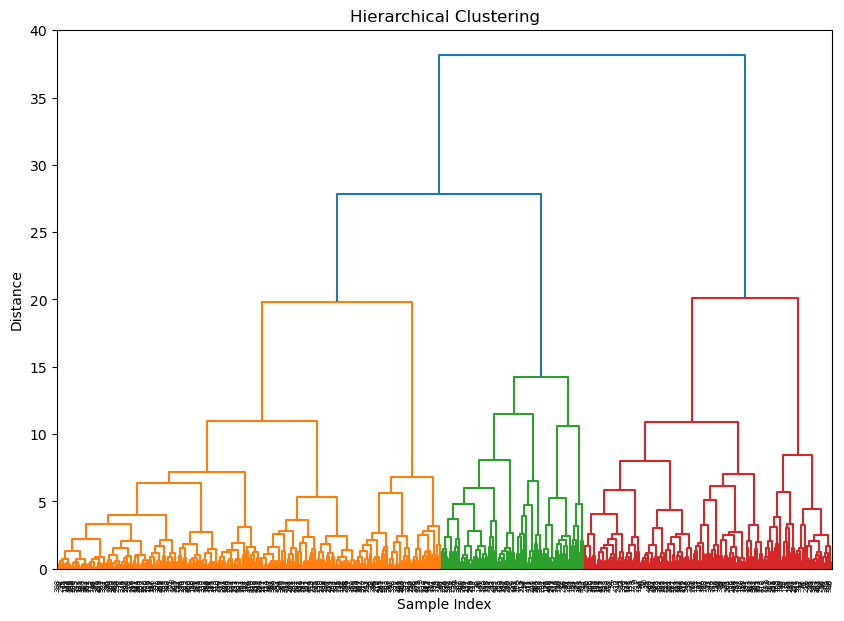

In [105]:
# Visualizing it

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=df_final.index,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Cutting the Dendrogram to Form Clusters

In [99]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_final['HCluster'] = cluster.fit_predict(df_final.drop(['Channel', 'Region', 'Cluster'], axis=1))

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [100]:
# Examine the cluster distribution
print(df_final['HCluster'].value_counts())

HCluster
0    218
1    102
2     81
3     39
Name: count, dtype: int64


In [101]:
# Analyzing the characteristics of each cluster
print(df_final.groupby('HCluster').mean())

             Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
HCluster                                                             
0        -0.136705 -0.649639 -0.675223  0.169449         -0.635998   
1        -0.584973  0.394872  0.580579 -0.580998          0.794936   
2         1.289770  0.323482  0.057638  0.395959         -0.265020   
3        -0.384678  1.926727  2.136176 -0.250023          2.026428   

          Delicassen   Channel    Region   Cluster  
HCluster                                            
0          -0.428510  1.032110  2.504587  0.513761  
1          -0.295726  1.735294  2.637255  1.637255  
2           1.260542  1.283951  2.580247  1.037037  
3           0.550646  1.948718  2.435897  3.000000  


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [106]:
# Importing libraries

from sklearn.decomposition import PCA

In [107]:
# Drop non-relevant columns for PCA
pca_features = df_final.drop(['Channel', 'Region', 'Cluster'], axis=1)

In [108]:
# Initialize PCA
pca = PCA()
pca.fit(pca_features)

PCA()

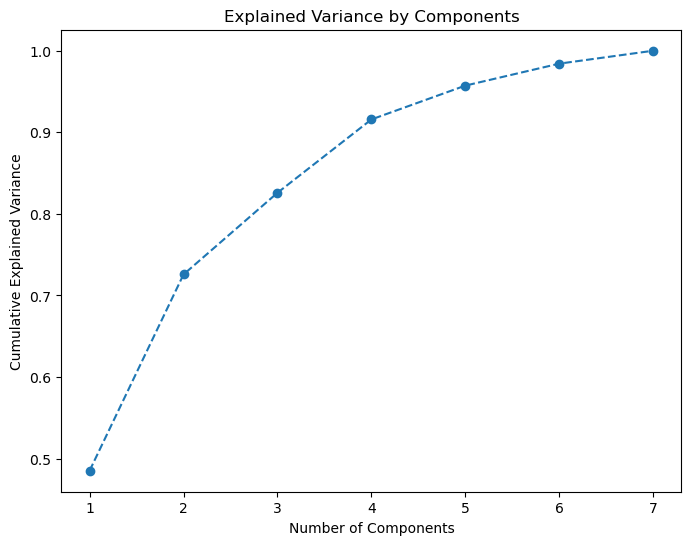

In [109]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
# Here it looks like having 4 components is ideal

In [110]:
# Applying PCA with 4 components
pca = PCA(n_components=4)
pca_result = pca.fit_transform(pca_features)
pca_result

array([[ 0.69046271, -0.44252477,  0.63807979,  0.09636665],
       [ 1.02885958, -0.32010987, -0.18168882,  0.47621558],
       [ 1.79750778,  0.87601829,  0.05173087,  2.00366983],
       ...,
       [ 4.68994934, -0.51938275,  0.43251001, -0.68063512],
       [-1.25533555,  0.06710357,  0.55761915,  1.15242652],
       [-1.71843166, -1.55154844,  0.33654198,  0.04802294]])

In [112]:
# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'])

In [116]:
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Cluster
0,0.690463,-0.442525,0.638080,0.096367,0
1,1.028860,-0.320110,-0.181689,0.476216,3
2,1.797508,0.876018,0.051731,2.003670,1
3,-1.376356,1.279308,-1.075104,0.224910,2
4,1.064019,2.370375,0.598097,1.215803,1
...,...,...,...,...,...
435,1.681173,2.983937,-0.784496,-0.822968,1
436,-0.529504,3.006899,1.382985,-0.346280,1
437,4.689949,-0.519383,0.432510,-0.680635,3
438,-1.255336,0.067104,0.557619,1.152427,0


In [113]:
# Adding back Clusters for visualization purposes
pca_df['Cluster'] = df_final['Cluster']

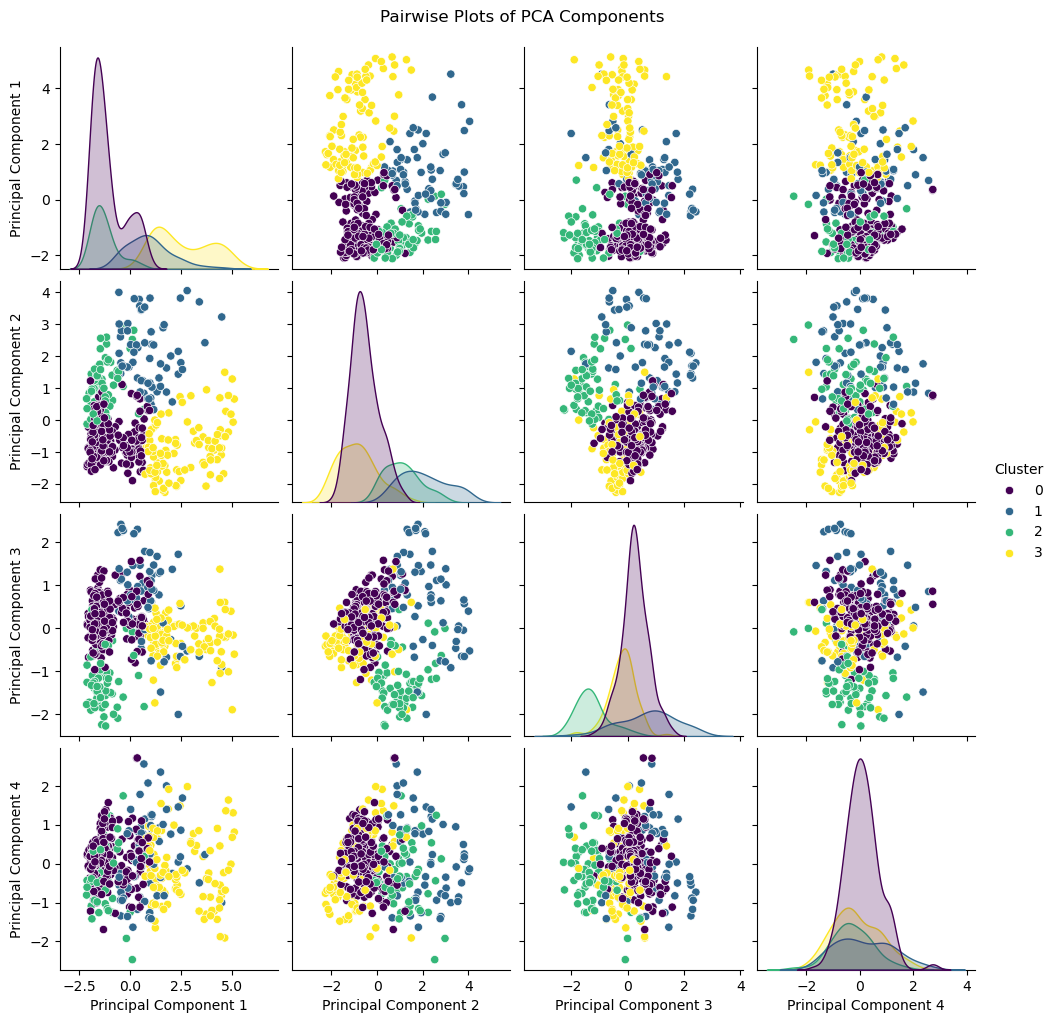

In [119]:
# Pair Plot so we can visualize all 4 components and their relationship to each other.

sns.pairplot(pca_df, hue='Cluster', vars=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'], palette='viridis')
plt.suptitle('Pairwise Plots of PCA Components', y=1.02)
plt.show()


### Cluster 0 - Coffee Shops and Cafes:
- **Description:** Customers here buy a decent amount of fresh and frozen stuff but not so much of the other things. They're probably small shops or cafes that need fresh fruits and veggies and some frozen items to keep things simple.

### Cluster 1 - Grocery Stores:
- **Description:** This group doesn't care much about fresh or frozen. They're all about buying lots of groceries and cleaning supplies. Think of big grocery stores that stock everything from canned food to detergent.

### Cluster 2 - Restaurants and Gourmet Food Shops:
- **Description:** These customers love their fresh produce and have a thing for nice deli items. They spend a bit on milk and frozen goods too but aren't too keen on groceries or cleaning stuff. They're likely fancy restaurants or gourmet food shops.

### Cluster 3 - Big Box Stores:
- **Description:** These are the heavy hitters in milk, groceries, and detergents. They probably run big stores focused on selling a lot of dairy, non-perishables, and cleaning supplies, not caring much about keeping things fresh or frozen.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Different Kinds of Customers:
Looking at the data, I saw that the wholesale customers really fall into their own groups. Some buy a lot of fresh and frozen stuff, others stock up on shelf-stable items, and then there are those who go big on the Delicatissen items. It's like identifying the regulars at a grocery store by what's in their carts.

### What Makes Customers Different:
My deep dive showed me that certain items like "Milk," "Groceries," and "Detergents_Paper" are big indicators of what group a customer might belong to.

### Location and How They Buy Matters:
I also noticed that where customers are and how they buy things (like Region and Channels) makes a difference in what they buy. I didn't set out to find this, but it popped up and gave me some cool insights into the buying habits.

### Make Smarter Moves:
All this info I gathered isn't just neat to know; it can actually help the distributor come up with better plans. Whether it's marketing in a way that speaks to each type of customer cluster or figuring out the best way to stock shelves in certain regions or channels, they've got a clearer path on how to make their customers happier and run the business smoother.

# Part VI - Data Visualization

## 1. Cluster Distribution Pie Chart
How customers are distributed across the identified clusters.

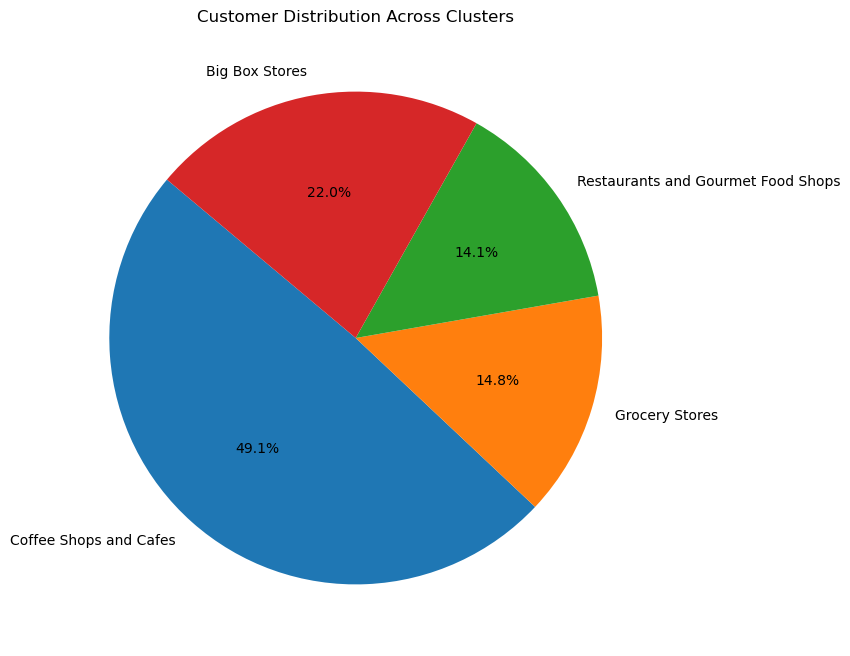

In [132]:
# Cluster titles
cluster_titles = {0: 'Coffee Shops and Cafes', 
                  1: 'Grocery Stores', 
                  2: 'Restaurants and Gourmet Food Shops', 
                  3: 'Big Box Stores'}

# Count the number of customers in each cluster
cluster_counts = df_final['Cluster'].value_counts().sort_index()

# Mapping the cluster numbers to the titles
labels = [cluster_titles[i] for i in cluster_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution Across Clusters')
plt.show()

## 2. Total $$ Spent in Each Cluster

In [127]:
# Adding clusters to the original DataFrame
df['Cluster'] = df_final['Cluster']

In [129]:
# Sum of spending across all categories for each entry, then summing those totals by cluster
total_spending_by_cluster = df.drop(['Channel', 'Region'], axis=1, errors='ignore').groupby('Cluster').sum().sum(axis=1)

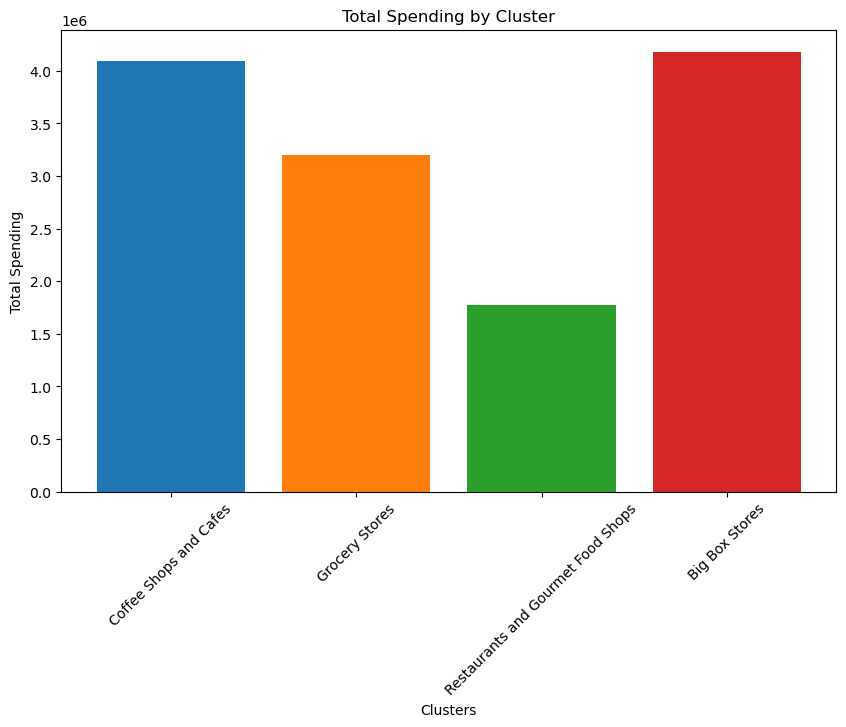

In [131]:
cluster_titles = ['Coffee Shops and Cafes', 'Grocery Stores', 'Restaurants and Gourmet Food Shops', 'Big Box Stores']

plt.figure(figsize=(10, 6))
plt.bar(cluster_titles, total_spending_by_cluster, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Clusters')
plt.ylabel('Total Spending')
plt.title('Total Spending by Cluster')
plt.xticks(rotation=45)
plt.show()


In [136]:
# We can see here that our Clusters of customers who are spending the most money are the Coffee Shops and Big Box Stores.

## 3. Total Spending by Product Category

In [134]:
# Calculate the total spent for each feature, excluding Channel, Region and Clusters
total_spent_by_feature = df.drop(['Channel', 'Region', 'Cluster'], axis=1, errors='ignore').sum()

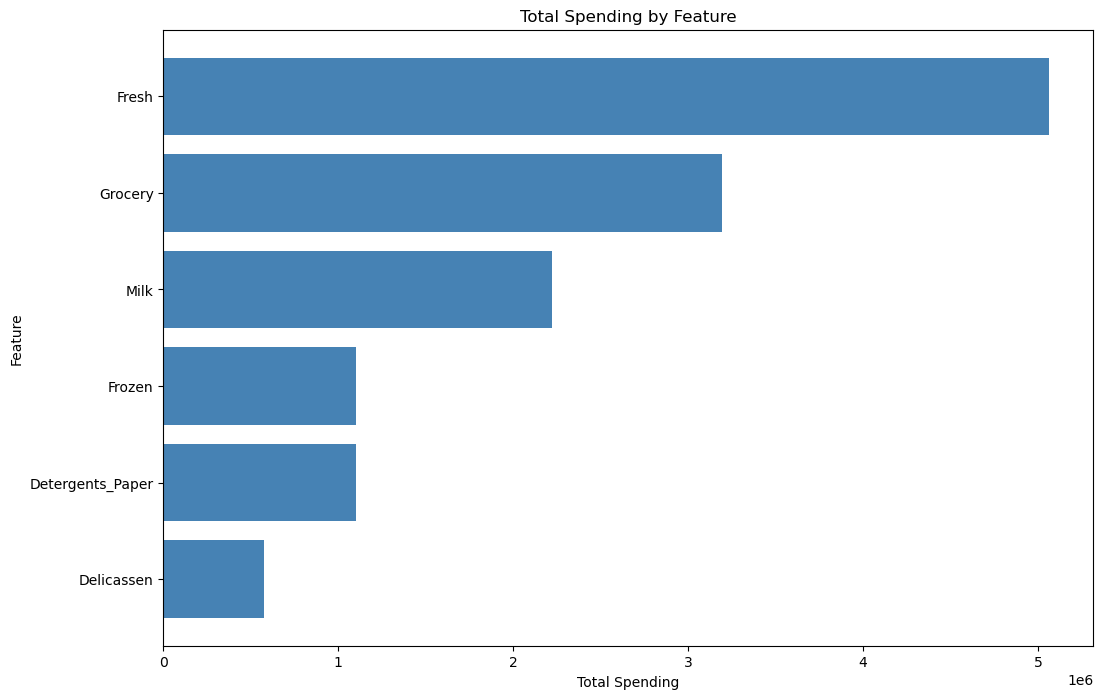

In [135]:
# Sorting the totals for better visualization
sorted_totals = total_spent_by_feature.sort_values()

plt.figure(figsize=(12, 8))
plt.barh(sorted_totals.index, sorted_totals, color='steelblue')
plt.xlabel('Total Spending')
plt.ylabel('Feature')
plt.title('Total Spending by Feature')
plt.show()

In [137]:
# Fresh is the category that produces the most revenue.

## 4. Total Spending by Channel

In [139]:
# Dropping non-relevant columns
spending_columns = df.drop(['Channel', 'Region', 'Cluster'], axis=1, errors='ignore')


In [141]:
# Sum spending across all categories for each entry
df['Total Spending'] = spending_columns.sum(axis=1)

In [143]:
# Aggregate this total spending by Channel
total_spending_by_channel = df.groupby('Channel')['Total Spending'].sum()

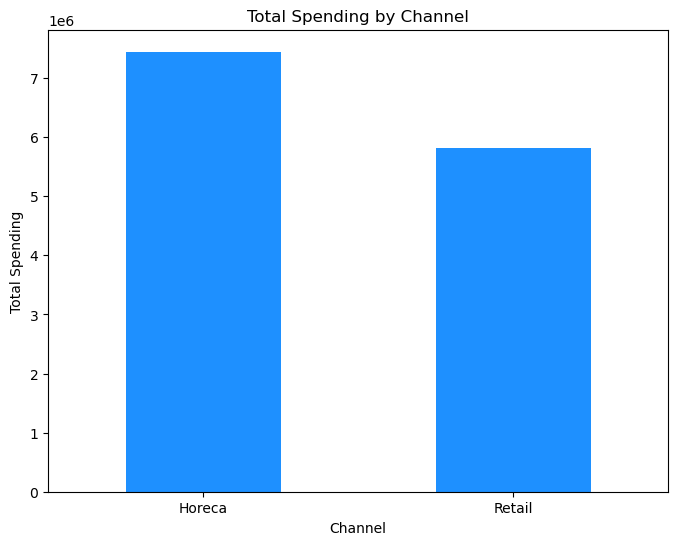

In [144]:
# Create a dictionary to map channel numbers to more descriptive names
channel_names = {1: 'Horeca', 2: 'Retail'} 

# Map channel numbers to names for plotting
total_spending_by_channel.index = total_spending_by_channel.index.map(channel_names)

plt.figure(figsize=(8, 6))
total_spending_by_channel.plot(kind='bar', color='dodgerblue')
plt.xlabel('Channel')
plt.ylabel('Total Spending')
plt.title('Total Spending by Channel')
plt.xticks(rotation=0)  # Keeping the channel names horizontal
plt.show()

## 5. Spending by Region

In [146]:
# Dropping non-relevant columns
spending_columns = df.drop(['Channel', 'Region', 'Cluster'], axis=1, errors='ignore')

In [148]:
# Calculating the total spending for each entry
df['Total Spending'] = spending_columns.sum(axis=1)

In [149]:
# Aggregate the total spending by Region
total_spending_by_region = df.groupby('Region')['Total Spending'].sum()

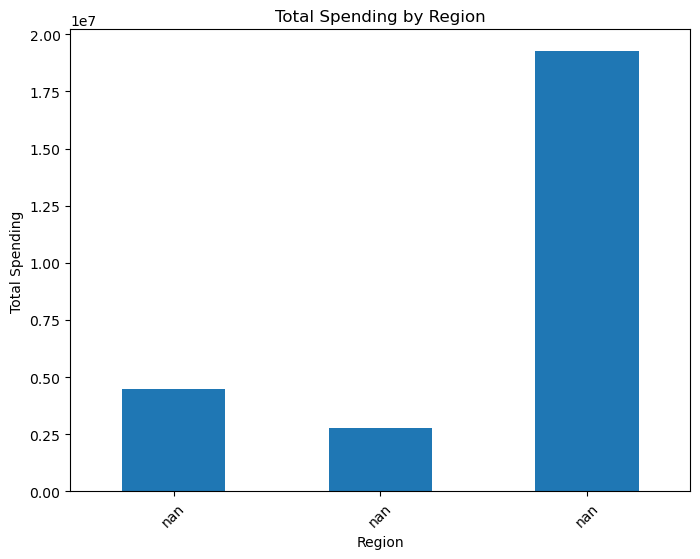

In [154]:
# Creating a dictionary for Region names
region_names = {1: 'Lisbon', 2: 'Oporto', 3: 'Other'} 

# Map region codes to names for plotting, if necessary
total_spending_by_region.index = total_spending_by_region.index.map(region_names)

plt.figure(figsize=(8, 6))
total_spending_by_region.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.title('Total Spending by Region')
plt.xticks(rotation=45)  # Rotating the Region for better readability
plt.show()